<a href="https://colab.research.google.com/github/Suhas-S63/Machine_Learning_Lab_T1/blob/main/2348563_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/emails.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
data.info

<bound method DataFrame.info of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]>

In [ ]:
data.isnull().sum()

text    0
spam    0
dtype: int64

Loading the dataset for splitting

In [5]:
X = data['text']
Y = data['spam']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=data.spam)

Using Vectorization for converting words into numbers

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Training the Model with Laplace Smoothing

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha= 1)
model.fit(X_train,Y_train)

MultinomialNB(alpha=1)

Predictions

In [9]:
Y_predictions = model.predict(X_test)
Y_predictions_probability = model.predict_proba(X_test)[:,1] #Only to get probabilities for Positive Classes in Predictions

Data Overview Graph for illustration of ditribution of email dataset

([<matplotlib.patches.Wedge at 0x7ce64ef12320>,
 [Text(0.8047919087032823, 0.7498733117572114, 'Spam'),
  Text(-0.8047918735991785, -0.7498733494322385, 'Not Spam')],
 [Text(0.43897740474724484, 0.4090218064130243, '23.9%'),
  Text(-0.43897738559955185, -0.4090218269630392, '76.1%')])

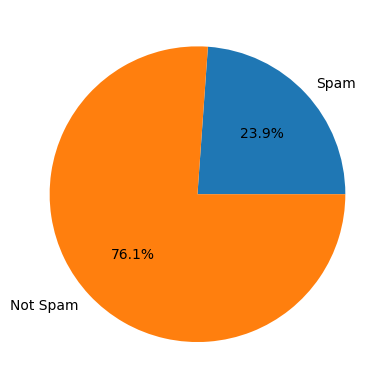

In [10]:
spam_count = Y_train.value_counts()[1]
non_spam_count = Y_train.value_counts()[0]
labels = ['Spam', 'Not Spam']
sizes = [spam_count, non_spam_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

Confusion Matrix to illustrate model performance

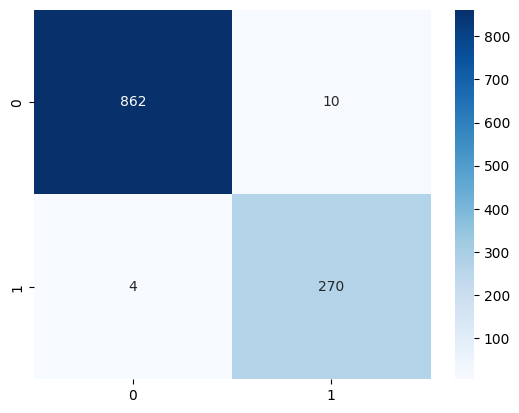

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
perf = sns.heatmap(confusion_matrix(Y_test,Y_predictions), annot=True,fmt='d',cmap='Blues')
plt.show()

The confusion matrix you provided shows the performance of a spam email classifier on a test set of data. The classifier is able to correctly identify 862 spam emails and 270 ham emails. However, it also misclassifies 10 spam emails as ham and 4 ham emails as spam.

Illustration of ROC curve

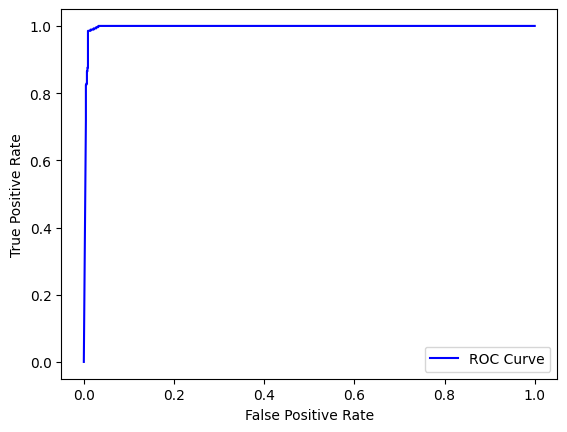

In [12]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, Y_predictions_probability)
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The graph says that the model is very good at distinguishing between spam and non-spam emails

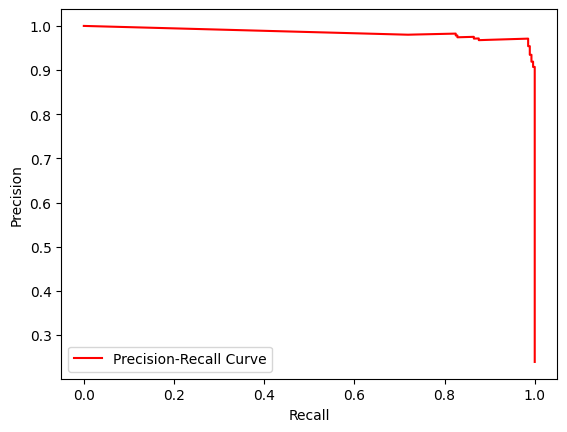

In [13]:
from sklearn.metrics import precision_recall_curve,classification_report, precision_score, recall_score
precision, recall, _ = precision_recall_curve(Y_test, Y_predictions_probability)
plt.plot(recall, precision, color='r', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

The above graph shows that the model is able to achive high precision, which means that the model is very good at identifying the spam emails that are actually spam, but some may be missed

Precision and recall are important metrics in spam detection. Precision measures the accuracy of the predictions made by the model and Recall metric is for understanding the model's ability to identify the spam emails by showing the count of actual spam emails predicted correctly.

Laplace smoothing ensures that small probabilites or zero probabilities are handled correctly during training of the model

In [16]:
# Evaluation metrics
print(classification_report(Y_test, Y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.96      0.99      0.97       274

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



Feature Importance Graph:
Here, It refers to the significance of words or phrases in determining whether an email is spam or not. The model calculates the important features based on their probabilities.

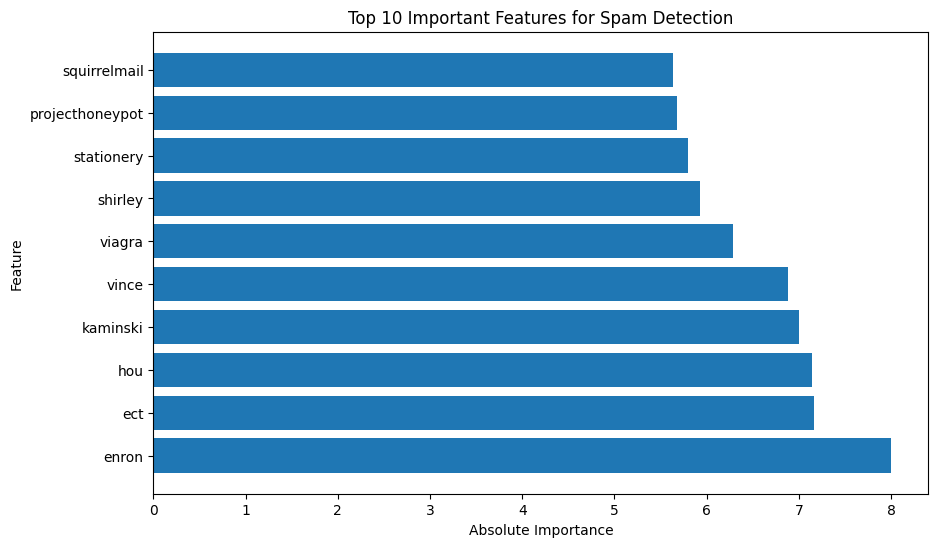

In [18]:
# Getting feature names
feature_names = np.array(vectorizer.get_feature_names_out())

# Getting feature importances (log probabilities) from the model
log_probabilities = model.feature_log_prob_

# Calculating absolute feature importance scores
absolute_importance = np.abs(log_probabilities[1] - log_probabilities[0])

# Getting indices of top N important features
N=10
top_n_indices = np.argsort(absolute_importance)[-N:]

# Creating a horizontal bar chart for the top N important features
plt.figure(figsize=(10, 6))
plt.barh(range(N), absolute_importance[top_n_indices][::-1], align='center')
plt.yticks(range(N), feature_names[top_n_indices][::-1])
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features for Spam Detection'.format(N))
plt.show()

The graph shows the 10 important features in the prediction of the spam emails.

Threshold Analysis

In [19]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = []
recalls = []
for t in thresholds:
    y_pred_t = Y_predictions_probability > t
    precision = precision_score(Y_test, y_pred_t)
    recall = recall_score(Y_test, y_pred_t)
    precisions.append(precision)
    recalls.append(recall)

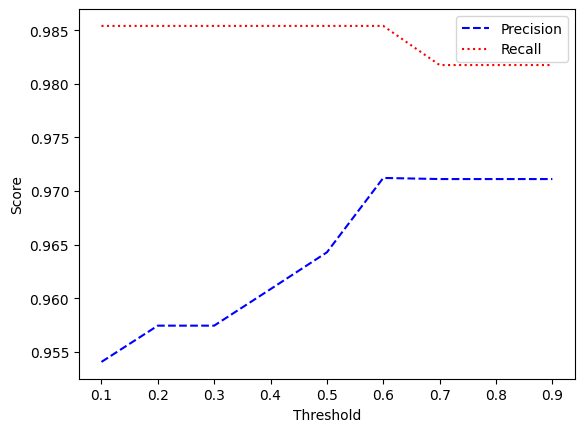

In [20]:
plt.plot(thresholds, precisions, 'b--', label='Precision')
plt.plot(thresholds, recalls, 'r:', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()